In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

DATASETS

In [2]:
freedom_expression =  pd.read_csv('freedom-of-expression-index.csv')
freedom_expression = freedom_expression.loc[freedom_expression['Year'] == 2024].reset_index(drop=True)

In [3]:
freedom_association = pd.read_csv('freedom-of-association-index.csv')
freedom_association = freedom_association.loc[freedom_association['Year'] == 2024].reset_index(drop=True)

In [4]:
human_rights = pd.read_csv('human-rights-index-vdem.csv')
human_rights = human_rights.loc[human_rights['Year'] == 2024].reset_index(drop=True)

In [5]:
set(human_rights['Entity']).difference(freedom_association['Entity'])

set()

In [6]:
set(freedom_association['Entity']).difference(human_rights['Entity'])

set()

In [7]:
set(human_rights['Entity']).difference(freedom_expression['Entity'])

set()

In [8]:
set(freedom_expression['Entity']).difference(human_rights['Entity'])

set()

In [9]:
set(freedom_association['Entity']).difference(freedom_expression['Entity'])

set()

In [10]:
set(freedom_expression['Entity']).difference(freedom_association['Entity'])

set()

SELECIONANDO COLUNAS

In [11]:
freedom_expression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Entity                                                                                 193 non-null    object 
 1   Code                                                                                   178 non-null    object 
 2   Year                                                                                   193 non-null    int64  
 3   Freedom of expression and alternative sources of information index (central estimate)  193 non-null    float64
 4   World regions according to OWID                                                        0 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.7+ KB


In [12]:
freedom_expression = freedom_expression.iloc[:, [0, 3]]

In [13]:
freedom_association.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Entity                                                 193 non-null    object 
 1   Code                                                   178 non-null    object 
 2   Year                                                   193 non-null    int64  
 3   Freedom of association thick index (central estimate)  193 non-null    float64
 4   World regions according to OWID                        0 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.7+ KB


In [14]:
freedom_association = freedom_association.iloc[:, [0, 3]]

In [15]:
human_rights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    193 non-null    object 
 1   Code                                      178 non-null    object 
 2   Year                                      193 non-null    int64  
 3   Civil liberties index (central estimate)  193 non-null    float64
 4   World regions according to OWID           0 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.7+ KB


In [16]:
human_rights = human_rights.iloc[:, [0, 3]]

RENOMEANDO COLUNAS

In [17]:
human_rights = human_rights.rename(columns={
    'Civil liberties index (central estimate)': 'direitos_humanos'
})

In [18]:
human_rights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            193 non-null    object 
 1   direitos_humanos  193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [19]:
freedom_expression = freedom_expression.rename(columns={
    'Freedom of expression and alternative sources of information index (central estimate)': 'liberdade_expressao'
})

In [20]:
freedom_expression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               193 non-null    object 
 1   liberdade_expressao  193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [21]:
freedom_association = freedom_association.rename(columns={
    'Freedom of association thick index (central estimate)': 'liberdade_associacao'
})

In [22]:
freedom_association.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                193 non-null    object 
 1   liberdade_associacao  193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


JUMTANDO DATAFRAMES

In [23]:
df_merged = human_rights.merge(freedom_expression, on='Entity').merge(freedom_association, on='Entity')

In [24]:
df_merged.head()

,Entity,direitos_humanos,liberdade_expressao,liberdade_associacao
0,Afghanistan,0.042000,0.090000,0.050000
1,Africa,0.581875,0.582304,0.561589
2,Africa (population-weighted),0.552009,0.590038,0.557035
3,Albania,0.876000,0.698000,0.820000
4,Algeria,0.416000,0.343000,0.303000


TRANSFORMANDO DADOS: BRASIL

In [25]:
df_brasil = df_merged.melt(
    id_vars='Entity',
    value_vars=[
        'direitos_humanos',
        'liberdade_expressao',
        'liberdade_associacao'
    ],
    var_name='Tipo', 
    value_name='Valor'
)

In [26]:
df_brasil = df_brasil.loc[df_brasil['Entity'] == 'Brazil'].reset_index(drop=True)

In [27]:
df_brasil

,Entity,Tipo,Valor
0,Brazil,direitos_humanos,0.850
1,Brazil,liberdade_expressao,0.929
2,Brazil,liberdade_associacao,0.891


TRANSFORMANDO DADOS: MUNDO

In [28]:
df_mundo = df_merged.melt(
    id_vars='Entity',
    value_vars=[
        'direitos_humanos',
        'liberdade_expressao',
        'liberdade_associacao'
    ],
    var_name='Tipo', 
    value_name='Valor'
)

In [29]:
df_mundo['Entity'] = 'Mundo'

In [30]:
df_mundo.head()

,Entity,Tipo,Valor
0,Mundo,direitos_humanos,0.042000
1,Mundo,direitos_humanos,0.581875
2,Mundo,direitos_humanos,0.552009
3,Mundo,direitos_humanos,0.876000
4,Mundo,direitos_humanos,0.416000


In [31]:
df_mundo = df_mundo.groupby(['Entity', 'Tipo'])['Valor'].median().reset_index()

In [32]:
df_mundo.head()

,Entity,Tipo,Valor
0,Mundo,direitos_humanos,0.759
1,Mundo,liberdade_associacao,0.720
2,Mundo,liberdade_expressao,0.709


In [33]:
df_merged2 = pd.concat([df_mundo, df_brasil])

PLOTAGEM

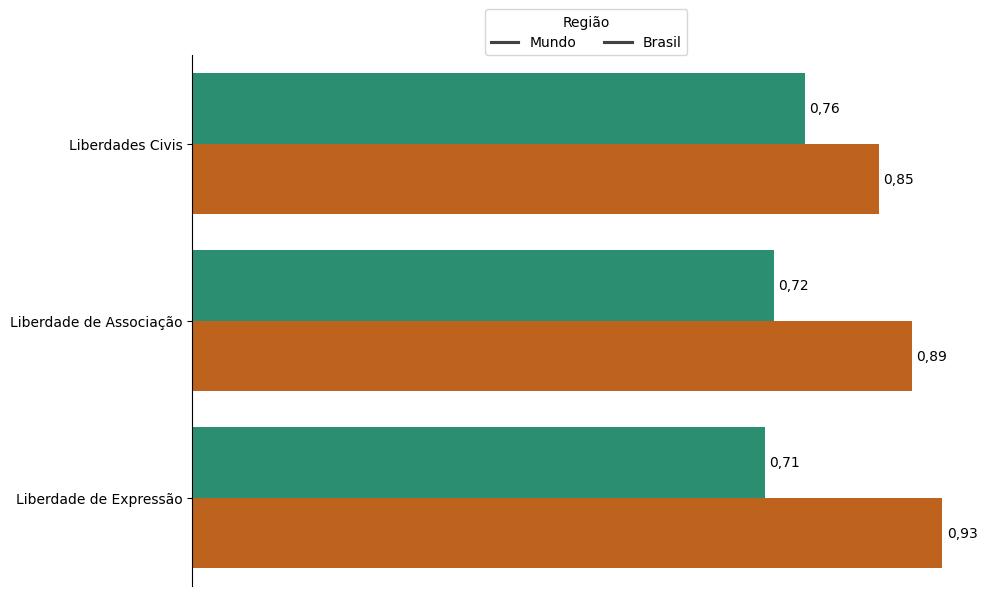

In [34]:
from cProfile import label


fig, ax = plt.subplots(figsize=(10, 6))

bar_plot = sns.barplot(df_merged2, y='Tipo', x='Valor', hue='Entity', palette='Dark2')

for container in bar_plot.containers:
    ax.bar_label(container, fmt=lambda x: f'{x:.2f}'.replace('.', ','), padding=3)

labels = ['Liberdades Civis', 'Liberdade de Associação', 'Liberdade de Expressão']

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.xaxis.set_visible(False)
plt.legend(title='Região', loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, labels=['Mundo', 'Brasil'])
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/comparacao_liberdade_expressao_associacao_dh.png', dpi=300, bbox_inches='tight')
plt.show()